### Team
##### Swaroop Bhandary
##### Vajra Ganeshkumar
##### Supriya Vadiraj

## Task 1
Use NumPy function to draw random samples from a normal (Gaussian) distribution.
- Create a set of 2000 samples using NumPy function. This data set should be distributed as a Gaussian with mean=0 and standard deviation (std)=0.2
- For the created data set verify the mean and the variance
- Display/plot the histogram of the samples, along with the probability density function using matplotlib.pyplot and np functions

In [1]:
import numpy as np
import scipy 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import minimize
from sklearn.neighbors.kde import KernelDensity
from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
import matplotlib

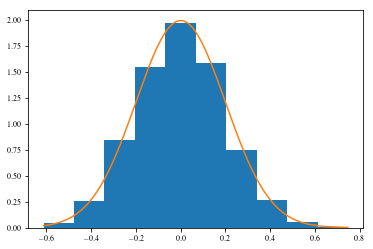

In [3]:
def minimize_function(x, args):
    mean = x[0]
    std_dev = x[1]
    numerator = np.exp(-1*((args[0]-mean)**2)/(2*std_dev**2))
    denominator = std_dev*np.sqrt(2*np.pi)
    predicted_pdf = numerator/denominator
    LL = -np.sum(stats.norm.logpdf(predicted_pdf, loc=args[1]))
    return LL

sigma = 0.2
mean = 0
guassian_distribution = np.random.normal(mean, sigma, 2000)
pdf = scipy.stats.norm.pdf(guassian_distribution, loc=mean,scale=sigma)

initial_params = [100, 12]
args = [guassian_distribution, pdf]
result = minimize(minimize_function, initial_params, args=args, method='Nelder-Mead')
result.x

guassian_distribution.sort()
pdf = scipy.stats.norm.pdf(guassian_distribution, loc=0,scale=0.2)
plt.hist(guassian_distribution, normed=True)
plt.plot(guassian_distribution, pdf)
plt.show()

## Task 2
Two-dimensional kernel density estimate: comparing scikit-learn and scipy

* "Kernel density estimation is a way to estimate the probability density function (PDF) of a random variable in a non-parametric way"
<br>
<br>
**Scikit learn**
<br>

* Scikit-learn implements efficient kernel density estimation using either a Ball Tree or KD Tree structure, through the *sklearn.neighbors.KernelDensity* estimator
* *sklearn.neighbors.KernelDensity* is usually fast when compared to scipy
* There is no helper to determine the bandwidth.But it can be *crossvalidated*
* Supports Tree-based computation
<br>
<br>
**Scipy**
<br>

*  *scipy.stats.gaussian_kde* works for both uni-variate and multi-variate data. It includes automatic bandwidth determination
* This has bandwidth selection option
* Does not support kernel shapes other than guassian
* Also,it does not support weighted samples
* Does not support Tree-based computation

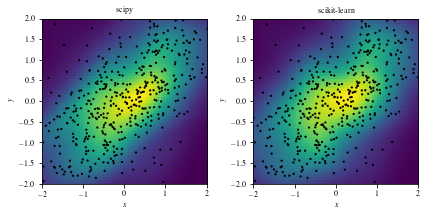

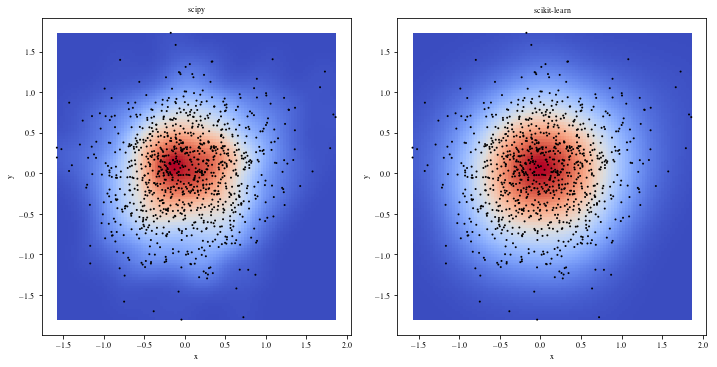

In [2]:
matplotlib.rc('legend', fontsize=8, handlelength=3)
matplotlib.rc('axes', titlesize=8)
matplotlib.rc('axes', labelsize=8)
matplotlib.rc('xtick', labelsize=8)
matplotlib.rc('ytick', labelsize=8)
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', size=8, family='serif',
              style='normal', variant='normal',
              stretch='normal', weight='normal',
              serif='Times')

def kde1(x, y, ax):
    xy = np.vstack([x,y])
    kernel = gaussian_kde(xy, bw_method='silverman')

    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(kernel(positions).T, X.shape)

    ax.imshow(np.rot90(Z), cmap=plt.cm.viridis,
              extent=[xmin, xmax, ymin, ymax])
    
    ax.scatter(x, y, c='k', s=5, edgecolor='')

def kde2(x, y, ax):
    xy = np.vstack([x,y])

    d = xy.shape[0]
    n = xy.shape[1]
    bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) 
    #bw = n**(-1./(d+4)) # scott
    #print('bw: {}'.format(bw))
    
    kde = KernelDensity(bandwidth=bw, metric='euclidean',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(xy.T)
    
    xmin = x.min()
    xmax = x.max()
    ymin = y.min()
    ymax = y.max()
    
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])

    Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    ax.imshow(np.rot90(Z), cmap=plt.cm.viridis,
              extent=[xmin, xmax, ymin, ymax])
    
    ax.scatter(x, y, c='k', s=5, edgecolor='')

N1 = np.random.normal(size=500)
N2 = np.random.normal(scale=0.5, size=500)
x = N1+N2
y = N1-N2

fig, axarr = plt.subplots(1, 2)
fig.subplots_adjust(left=0.11, right=0.95, wspace=0.0, bottom=0.18)

ax = axarr[0]
kde1(x, y, ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('scipy')

ax.set_xlim((-2,2))
ax.set_ylim((-2,2))

ax = axarr[1]
kde2(x, y, ax)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_title('scikit-learn')

ax.set_xlim((-2,2))
ax.set_ylim((-2,2))

plt.tight_layout()
plt.show()

def kernel_density_estimation(N1, N2, ax, using= 'scipy'):
    
    x = N1+N2
    y = N1-N2

    data = np.vstack((x, y))
    x_min, x_max = x.min(), x.max()
    y_min, y_max = y.min(), y.max()

    X, Y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    
    if using == 'scipy':
        scipy_kernel = gaussian_kde(data)
        Z = np.reshape(scipy_kernel(positions).T, X.shape)
        
    elif using == 'scikit-learn':
        d, n = data.shape
        bw = (n * (d + 2) / 4.)**(-1. / (d + 4)) # silverman
        #bw = n**(-1./(d+4)) # scott
        
        kde = KernelDensity(bandwidth=bw, metric='euclidean',
                        kernel='gaussian', algorithm='ball_tree')
        kde.fit(data.T)
        Z = np.reshape(np.exp(kde.score_samples(positions.T)), X.shape)

    ax.imshow(np.rot90(Z), cmap=plt.cm.coolwarm,
                  extent=[x_min, x_max, y_min, y_max])
    ax.scatter(x, y, c='k', s=4, edgecolor='')
    ax.set_title(using)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
np.random.seed(1)
N1 = np.random.normal(0, scale= np.random.random(), size= 1000)
N2 = np.random.normal(0, scale= np.random.random(), size= 1000)

fig, subplots = plt.subplots(1, 2)
fig.set_figheight(10)
fig.set_figwidth(10)
kernel_density_estimation(N1, N2, ax= subplots[0], using= 'scipy')
kernel_density_estimation(N1, N2, ax= subplots[1], using= 'scikit-learn')
plt.tight_layout()
plt.show()

#### Reference:
* Scikit Learn- Kernel density estimation:  http://scikit-learn.org/stable/modules/density.html
* Scipy- Kernel density estimation https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html
* [daleroberts Githubgist](https://gist.github.com/daleroberts/7a13afed55f3e2388865b0ec94cd80d2)
* Comparision between Scipy and Scikit-learn
1. \href{}